In [6]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC

# Load File

In [98]:
# Open file.
DATASET_FOLDER = '../../dataset/'
FILE_NAME = 'MOD13Q1.A2000241.h22v10.061.2020051013808.hdf'
hdf = SD(DATASET_FOLDER + FILE_NAME, SDC.READ)


# Explore Data

{'250m 16 days NDVI': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DAY_250m_500m_VI'), (4800, 4800), 22, 0), '250m 16 days EVI': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DAY_250m_500m_VI'), (4800, 4800), 22, 1), '250m 16 days VI Quality': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DAY_250m_500m_VI'), (4800, 4800), 23, 2), '250m 16 days red reflectance': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DAY_250m_500m_VI'), (4800, 4800), 22, 3), '250m 16 days NIR reflectance': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DAY_250m_500m_VI'), (4800, 4800), 22, 4), '250m 16 days blue reflectance': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DAY_250m_500m_VI'), (4800, 4800), 22, 5), '250m 16 days MIR reflectance': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DAY_250m_500m_VI'), (4800, 4800), 22, 6), '250m 16 days view zenith angle': (('YDim:MODIS_Grid_16DAY_250m_500m_VI', 'XDim:MODIS_Grid_16DA

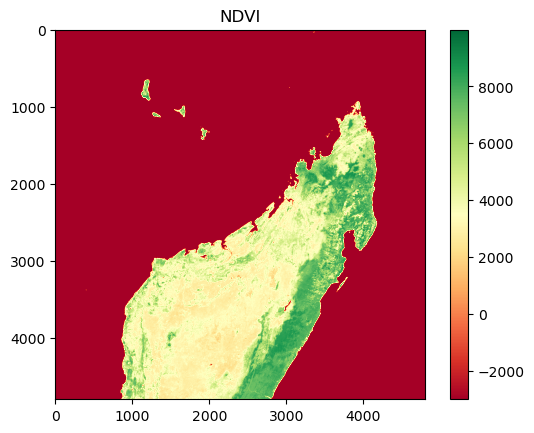

In [100]:
# List available SDS datasets.
print(hdf.datasets())
# Access the NDVI data
data = hdf.select('250m 16 days NDVI')[:]
# data = data[:,:]
# attrs = hdf.select('250m 16 days NDVI').attributes(full=1)
# fillvalue=attrs["_FillValue"]
# print(type(fillvalue[0]))
# print(type(data[0]))
# data = data.astype(float)

# # fillvalue[0] is the attribute value.
# fv = (fillvalue[0])
# data[data == fv] = np.nan
# data = np.ma.masked_array(data, np.isnan(data))
plt.imshow(data, cmap='RdYlGn')
plt.colorbar()
plt.title("NDVI")
plt.show()

In [101]:
# Import required libraries
import numpy as np
from pyproj import Proj

# Function to convert MODIS tile and pixel index to latitude and longitude
def modis_sinusoidal_to_latlon(h, v, x, y, cell_size=463.31271653):
    """
    Convert MODIS Sinusoidal grid tile (h, v) and pixel (x, y) to latitude and longitude.
    Parameters:
        h (int): Horizontal tile number (hXX).
        v (int): Vertical tile number (vXX).
        x (int): Pixel x index (column number in the array).
        y (int): Pixel y index (row number in the array).
        cell_size (float): Pixel size in meters. Default for MODIS 250m products is ~463.3m.
    Returns:
        tuple: (latitude, longitude) of the pixel.
    """
    # Calculate the pixel's absolute x and y coordinates in the MODIS Sinusoidal projection
    # MODIS sinusoidal projection parameters
    tile_size_meters = 12000000 / 18  # Size of each tile in meters (10° in the MODIS projection)
    x_min = h * tile_size_meters - 20015109.354
    y_max = 10007554.677 - v * tile_size_meters

    # Calculate the pixel's position within the sinusoidal projection
    x_coord = x_min + (x * cell_size)
    y_coord = y_max - (y * cell_size)

    # Define the MODIS sinusoidal projection using pyproj
    modis_sinu_proj = Proj("+proj=sinu +R=6371007.181 +nadgrids=@null +wktext")

    # Convert from MODIS Sinusoidal to geographic coordinates (longitude, latitude)
    lon, lat = modis_sinu_proj(x_coord, y_coord, inverse=True)
    return lat, lon

# Example usage
# Assuming we are working with tile h34v08 and want the latitude/longitude of pixel (2400, 2400)
latitude, longitude = modis_sinusoidal_to_latlon(34, 8, 2400, 2400)
print(f"Latitude: {latitude}, Longitude: {longitude}")
# Define the lat/lon range of interest
lat_min, lat_max = 2, 4
lon_min, lon_max = 35, 37

# Convert the corner coordinates of the region to MODIS Sinusoidal indices
# Get the corresponding row/column indices for the region
# For example:
# Get indices for the top-left and bottom-right corners of the bounding box
y1, x1 = modis_sinusoidal_to_latlon(34, 8, 0, 0)   # top-left corner
y2, x2 = modis_sinusoidal_to_latlon(34, 8, 4800, 4800)  # bottom-right corner
print (y1,x1)
print (y2,x2)
# Use slicing to extract the region from the dataset
subset_ndvi = ndvi_data[int(y2):int(y1),int(x1):int(x2)]
print(subset_ndvi)



Latitude: 32.036235072246185, Longitude: 39.92625940429356
42.03623507139611 32.10624815046809
22.036235073096247 47.301531026767215
[[-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000 -3000
  -3000 -3000 -3000]
 [-3000 -300

In [62]:
# Read dataset.
DATAFIELD_NAME='250m 16 days NDVI'
data3D = hdf.select(DATAFIELD_NAME)
data = data3D[:,:]
data

array([[-3000, -3000, -3000, ..., -3000, -3000, -3000],
       [-3000, -3000, -3000, ..., -3000, -3000, -3000],
       [-3000, -3000, -3000, ..., -3000, -3000, -3000],
       ...,
       [-3000, -3000, -3000, ..., -3000, -3000, -3000],
       [-3000, -3000, -3000, ..., -3000, -3000, -3000],
       [-3000, -3000, -3000, ..., -3000, -3000, -3000]], dtype=int16)

In [85]:
# Read geolocation dataset.
lat = hdf.select('Latitude')
latitude = lat[:,:]
lon = hdf.select('Longitude')
longitude = lon[:,:]

# Handle fill value
very important!!!

In [86]:
attrs = data3D.attributes(full=1)
fillvalue=attrs["_FillValue"]
print(type(fillvalue[0]))
print(type(data[0]))
data = data.astype(float)

# fillvalue[0] is the attribute value.
fv = (fillvalue[0])
data[data == fv] = np.nan
data = np.ma.masked_array(data, np.isnan(data))

<class 'int'>
<class 'numpy.ma.core.MaskedArray'>


# Plot Data

In [1]:
# Draw an equidistant cylindrical projection using the low resolution
# coastline database.
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data)

print(data)
cb = m.colorbar()
cb.set_label('Unit:%')

plt.title('{0}\n {1} at H20PrsLvls=11'.format(FILE_NAME, DATAFIELD_NAME))
fig = plt.gcf()
# Show the plot window.
# plt.show()

In [15]:
data[30][20]

227.0625

In [ ]:
# Save plot.
pngfile = f"../assets/plots/{FILE_NAME}.py.png"
fig.savefig(pngfile)